In [1]:
!pip install -r ../requirements.txt

In [2]:
import numpy as np
import pandas as pd
import os #if im not know about my current library
import seaborn as sns
import matplotlib.pyplot as plt






### 2.Basic Processing

In [ ]:
df = pd.read_csv('./data/processed/ChurnModeling_Missing_Values_Handled.csv')

3.Outlier detection Technique

3.1 Distribution Plots

In [4]:
categorical_columns = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
numerical_columns  = ['Age','Tenure','CreditScore','Balance','EstimatedSalary','NumOfProducts']

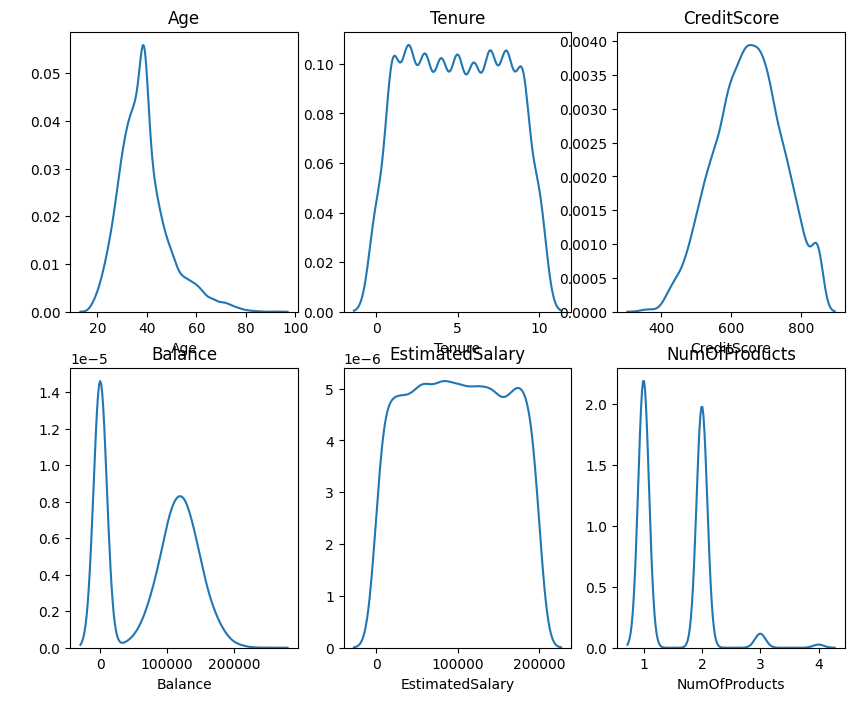

In [11]:
from matplotlib import axes


fig,axes=plt.subplots(2,3,figsize=(10,8))
axes = axes.flatten()
for idx ,col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col],ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel(" ")

plt.show()

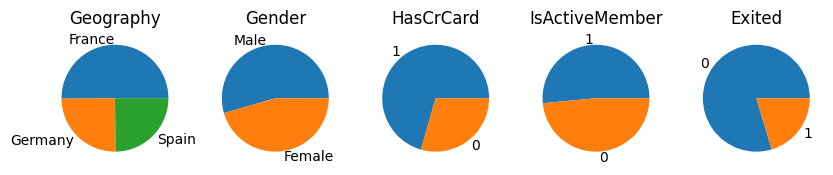

In [12]:
fig,axes=plt.subplots(1,5,figsize=(10,8))

for idx ,col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind='pie',
                                ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel(" ")
  
    

plt.show()

3.2 Box plot

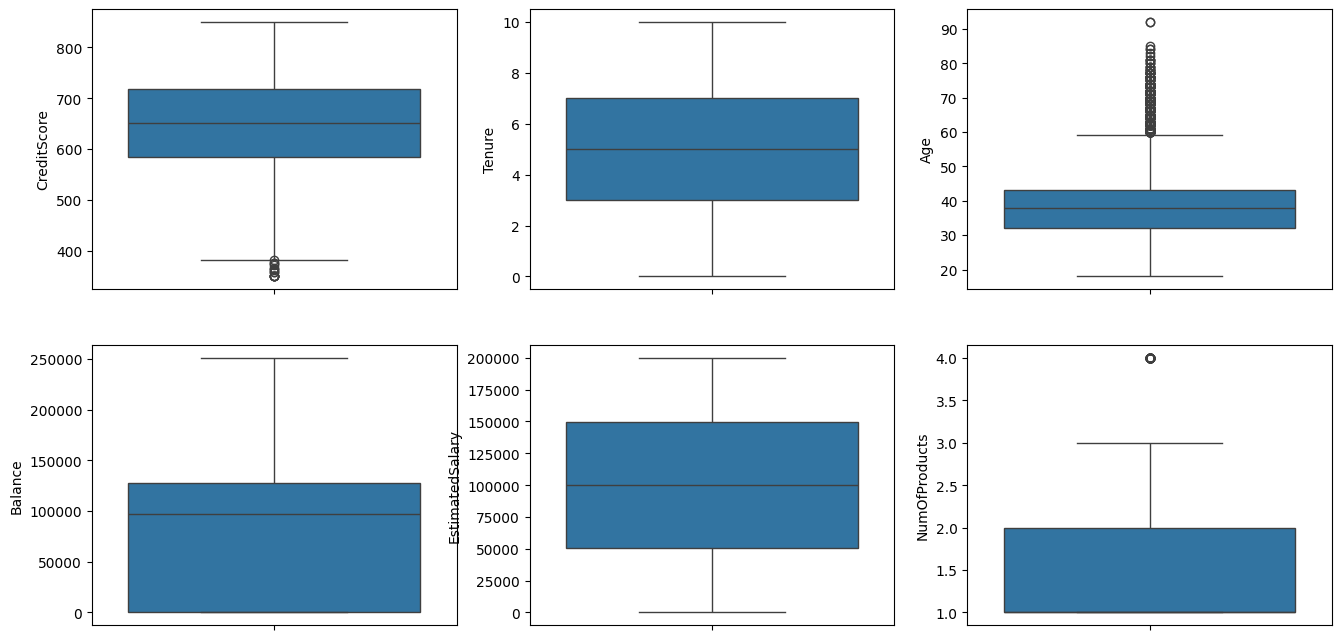

In [14]:
numerical_columns  = ['Age','Tenure','CreditScore','Balance','EstimatedSalary','NumOfProducts']

fig,axes=plt.subplots(2,3,figsize=(16,8))
sns.boxplot(data=df['CreditScore'],ax=axes[0,0])
sns.boxplot(data=df['Tenure'],ax=axes[0,1])
sns.boxplot(data=df['Age'],ax=axes[0,2])
sns.boxplot(data=df['Balance'],ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'],ax=axes[1,1])
sns.boxplot(data=df['NumOfProducts'],ax=axes[1,2])

plt.show()

3.3 Empirical Rule/3-sigma rule  #Find Anomalies

In [18]:
def find_anomalies(data):
    mean=data.mean()
    std=data.std()

    upper_bound = mean+(3*std)
    lower_bound = mean-(3*std)


    return (data>upper_bound) | (data<lower_bound)

In [22]:
numerical_columns  = ['Age','Tenure','CreditScore','Balance','EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomalies(df[col]).sum()
    n_outlier_percent = round(n_outliers/len(df),3)
    print(f"{col}: {n_outlier_percent}")
    

Age: 0.014
Tenure: 0.0
CreditScore: 0.001
Balance: 0.0
EstimatedSalary: 0.0


3.4 IQR method

In [23]:
def find_anomalie(data):
    Q1 = np.percentile(data,25)
    Q2 = np.percentile(data,50)
    Q3 = np.percentile(data,75)

    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 15*IQR


    return (data>upper_bound) | (data<lower_bound)

In [25]:
numerical_columns  = ['Age','Tenure','CreditScore','Balance','EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomalie(df[col]).sum()
    n_outlier_percent = round(n_outliers/len(df),3)
    print(f"{col}: {n_outlier_percent}")

Age: 0.05
Tenure: 0.0
CreditScore: 0.0
Balance: 0.0
EstimatedSalary: 0.0


In [38]:
outlier_masking_log = pd.DataFrame()
for col in numerical_columns:
    outlier_masking_log[col]=find_anomalie(df[col])

outlier_count = outlier_masking_log.sum(axis=1)
outlier_masking_log['outlier_count']=outlier_count

outlier_masking_log=outlier_masking_log[outlier_masking_log['outlier_count'] == 2]
outlier_masking_log


,Age,Tenure,CreditScore,Balance,EstimatedSalary,outlier_count


In [26]:
df.to_csv('./data/processed/ChurnModeling_Outliers_Handled.csv',index=False)